In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
train_data = pd.read_csv("mnist_train.csv")

In [7]:
test_data = pd.read_csv("mnist_test.csv")

In [8]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
a = train_data.iloc[4,1:].values

In [10]:
a = a.reshape(28,28).astype('uint8')

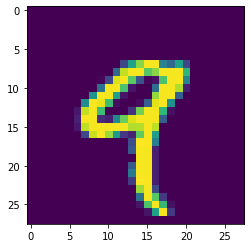

In [11]:
plt.imshow(a)

In [12]:
df_x = train_data.iloc[:,1:]

In [13]:
df_y = train_data.iloc[:,0]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_x , df_y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [15]:
y_train.head()

11565    3
25950    3
29527    6
17276    4
18242    8
Name: label, dtype: int64

In [16]:
X_train.shape

(12000, 784)

In [17]:
y_test.shape

(18000,)

In [18]:
X_test.shape

(18000, 784)

In [19]:
y_test.shape

(18000,)

In [20]:
#RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
#RF.fit(X_train,y_train)

In [21]:
#y_pred = RF.predict(X_test)

In [22]:
#y_pred

In [23]:
#RF.score(X_test , y_test)

In [24]:
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 80, num = 10)]

In [25]:
max_features = ['auto','sqrt']

In [26]:
max_depth = [2,4]

In [27]:
max_sample_split = [2,5]

In [28]:
min_sample_leaf = [1,2]

In [29]:
bootstrap = [True, False]

In [30]:
param_grid = {'n_estimators': n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'max_sample_split':max_sample_split,
             'min_sample_leaf':min_sample_leaf,
             'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'max_sample_split': [2, 5], 'min_sample_leaf': [1, 2], 'bootstrap': [True, False]}


In [31]:
RF_model = RandomForestClassifier()

In [32]:
#from  sklearn.model_selection import GridSearchCV
#RF_Grid = GridSearchCV(estimator = RF_model , param_grid = param_grid, cv =10 , verbose = 2, n_jobs = 4)

In [33]:
from  sklearn.model_selection import RandomizedSearchCV
RF_RandomGrid = RandomizedSearchCV(estimator = RF_model , param_distributions = param_grid, cv =10 , verbose = 2, n_jobs = 4)

In [ ]:
RF_RandomGrid.fit(X_train , y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
